# Video Game Sales Data Analysis

## Reading 'vgsales.csv' file
The 'Video Game Sales' dataset is read into a dataframe from a GitHub repository (using a URL)

The first 5 rows are shown to indiciate the dataset has been successfully read:

In [48]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DanielPitfield/Python_Data_Science/master/vgsales.csv'
sales = pd.read_csv(url) # Read data
sales.head() # Return first 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Missing values
The number of missing values for each column in the dataset is next identified:

In [49]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

The 'Year' value for 271 games is missing

The 'Publisher' value for 58 games is missing

## Distribution of Global Sales variable (Histogram)

Text(0, 0.5, 'Frequency')

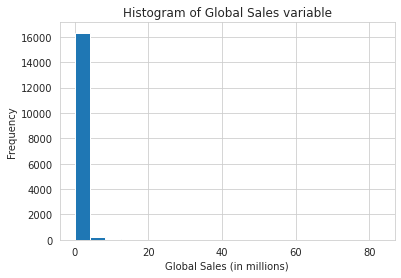

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(sales['Global_Sales'],bins=20)
plt.title('Histogram of Global Sales variable')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')

## Distribution of Global Sales variable (Boxplot)

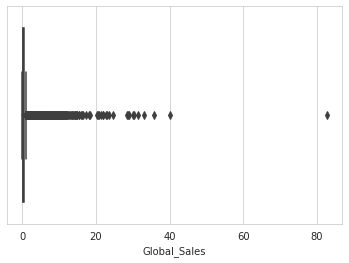

In [51]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(x='Global_Sales', data=sales, width=0.8)

## Platform - Global Sales

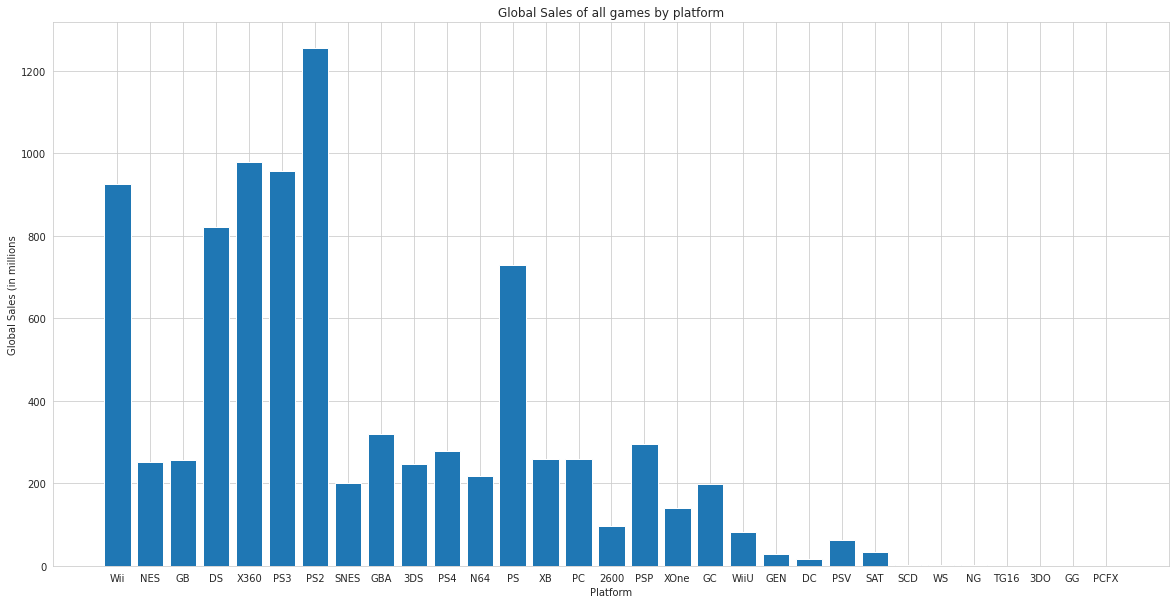

In [52]:
Platforms = pd.unique(sales['Platform'])
TotalSales = []

for x in Platforms:
  TotalSales.append(sales[sales['Platform'] == x]['Global_Sales'].sum())

plt.figure(figsize=(20,10))
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions')
plt.title('Global Sales of all games by platform')
plt.bar(Platforms, TotalSales)
plt.show()

## Search for video game (by name)
Enter a search term in the field and press 'Enter'

(All video games including that search term will be returned) 

In [53]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output

def display_name(Name):
    clear_output(wait=True) # Clear previous output (if any)
    if Name != "":
      display(sales[sales['Name'].str.contains(Name, case=False)])

interact(display_name, Name='');

interactive(children=(Text(value='', description='Name'), Output()), _dom_classes=('widget-interact',))

## Platform Sales - Region Distribution
Select a platform from the dropdown list

(A pie chart showing the regional distirbution of sales for the chosen platform will be displayed) 

In [54]:
import numpy as np

labels = 'NA', 'EU', 'JP', 'Other'
sizes = []
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

Platforms = np.append("", pd.unique(sales['Platform']))

def display_platform_sales(Platform):
    if Platform != "":
        sizes = [] # Reset this array
        clear_output(wait=True) # Clear previous output (if any)

        Total_Sales = sales[sales['Platform'] == Platform]['Global_Sales'].sum()

        NA_Sales = sales[sales['Platform'] == Platform]['NA_Sales'].sum()
        sizes.append((NA_Sales/Total_Sales)*100) # Percentage of Total Sales that are NA Sales

        EU_Sales = sales[sales['Platform'] == Platform]['EU_Sales'].sum()
        sizes.append((EU_Sales/Total_Sales)*100)

        JP_Sales = sales[sales['Platform'] == Platform]['JP_Sales'].sum()
        sizes.append((JP_Sales/Total_Sales)*100)

        Other_Sales = sales[sales['Platform'] == Platform]['Other_Sales'].sum()
        sizes.append((Other_Sales/Total_Sales)*100)

        # Plot
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
        plt.axis('equal')
        plt.title(Platform)
        plt.show()

interact(display_platform_sales, Platform=Platforms);

interactive(children=(Dropdown(description='Platform', options=('', 'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', '…

## Top 10 Best Selling Games (Platform)

In [55]:
def display_platform_top10(Platform):
    if Platform != "":
        num_rows = 0
        clear_output(wait=True) # Clear previous output (if any)

        sales_filter_platform = sales[sales['Platform'] == Platform].nlargest(10, 'Global_Sales')
        num_rows = sales_filter_platform.shape[0] # Number of rows in filtered dataset

        if num_rows > 0: # At least one row for that year
          #display(sales_filter_platform)

          bar_title = "Top 10 Best Selling Games on " + str(Platform)
          x_width = num_rows * 2 # Chnage graph width based on number of rows (0-10 rows possible)

          ax_platform = sales_filter_platform.plot(x='Name', y='Global_Sales', kind='bar', title = bar_title, legend=False, figsize=(x_width, 10))

          ax_platform.set_xlabel('Name')
          ax_platform.tick_params(axis='x', labelrotation=0) # Horizontal bar labels for x axis
          ax_platform.set_ylabel('Global Sales (in millions')
          ax_platform.plot()
        else:
          print("No games for that platform")

interact(display_platform_top10, Platform=Platforms);

interactive(children=(Dropdown(description='Platform', options=('', 'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', '…

## Top 10 Best Selling Games (Year)

In [56]:
Years = [""]
for x in range (1980, 2021): # Change to use minimum and maximum values of dataset not hardcoded values
  Years.append(x)

def display_year_top10(Year):
    if Year != "":
        num_rows = 0
        clear_output(wait=True)

        sales_filter_year = sales[sales['Year'] == Year].nlargest(10, 'Global_Sales')
        num_rows = sales_filter_year.shape[0] # Number of rows in filtered dataset

        if num_rows > 0: # At least one row for that year
          #display(sales_filter_year)

          bar_title = "Top 10 Best Selling Games in " + str(Year)
          x_width = num_rows * 2 # Chnage graph width based on number of rows (0-10 rows possible)

          ax = sales_filter_year.plot(x='Name', y='Global_Sales', kind='bar', title = bar_title, legend=False, figsize=(x_width, 10))

          ax.set_xlabel('Name')
          ax.tick_params(axis='x', labelrotation=0) # Horizontal bar labels for x axis
          ax.set_ylabel('Global Sales (in millions')
          ax.plot()
        else:
          print("No games for that year")

interact(display_year_top10, Year=Years);   

interactive(children=(Dropdown(description='Year', options=('', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987…

## Platform Genre Sales